## Module III: What kind of drugs should we develop?

#### What is factor analysis?

Factor analysis is a useful method that helps you model observed variables and how they relate to each other.
An attempt is made to describe the covariance structure of the observed variables with a smaller number of underlying unobservable latent factors.

#### What are the relationships between covariance matrix, factor analysis, and principal component analysis (PCA)?

Covariance Matrix: Covariance is a measure of the joint variability of two random variables. A covariance matrix is then the covariance between each pair of elements of a given vector. The relationship between covariance matrix and factor analysis is that factor analysis tries to approximate the covariance matrix using a low rank decomposition with the factor loading matrix. 

$$ 
\text{cov}(\mathbf{x}) = \mathbf{W} \mathbf{W}^\top + \boldsymbol{\psi} 
$$ 

where W is the Loading Matrix and $\boldsymbol{\psi}$ is another covariance matrix which describes the data genaration 

Principal Component Analysis: PCA is a method to reduce the dimensionality. The idea is to (linearly) transform the data to a new coordinate system. 
This system is spanned by the principal components. These principal coponents are eigenvectors calculated from the k largests eigenvalues of  $ X \mathbf{X}^\top $ , such that the largest variation in the data is captured. So PCA and FA are two different methods, PCA mainly for dimensionality reduction and FA for describing the data with the underlying latent factors. But PCA can be seen as special case of FA where $\boldsymbol{\psi} = \sigma \mathbf{I}$.

#### What do we mean with loadings?
Loadings are coefficients which are represented in de Loading Matrix W. A loading represents the relationship between an observed variables (columns of the matrix W) and a latent variable (columns of the Matrix W).

In [39]:
#!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

#Car Survey Dataset
df = pd.read_csv("Car_survey.csv")
df = df.iloc[:,1:]
df.dropna(inplace=True)
X = df
df.head()

,Car Model,Exciting,Trustworthy,Luxurious,Proper for outdoors,Powerful,Stylish,Comfortable,Vigorous,Pleasing,Safe,Performance,Family,Versatile,Sports,Status,Practical
0,Chrysler Town & Country,3,5,5,1,3.0,4,5,1.0,3.0,5.0,3.0,5.0,3.0,1.0,4.0,3.0
1,Mercedes C280,2,3,2,1,2.0,1,2,2.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,4.0
3,Porshe Boxter,3,2,3,1,2.0,3,3,1.0,3.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0
4,Volvo V90,5,4,4,2,3.0,5,3,3.0,5.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0
6,Ford Explorer,3,2,3,1,3.0,4,2,2.0,2.0,3.0,2.0,2.0,2.0,4.0,1.0,2.0


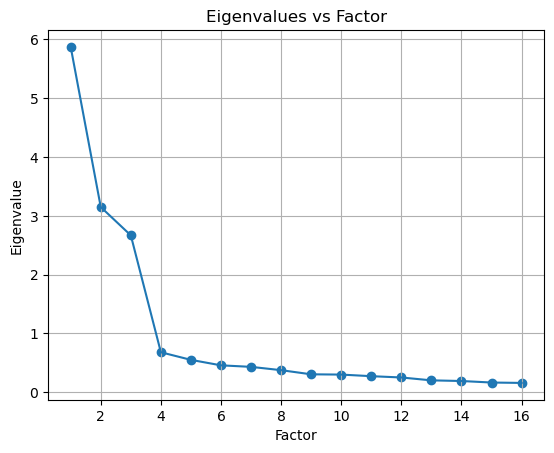

In [40]:
# Fit factor analysis model
fa = FactorAnalyzer(n_factors=15)
fa.fit(X.iloc[:,1:])

# Get factor loadings
loadings = fa.loadings_
eigenvalues, eigenvectors = fa.get_eigenvalues()

#Check the eigenvalues
axes = range(1, len(eigenvalues) + 1)
plt.scatter(axes, eigenvalues)
plt.plot(axes, eigenvalues)
plt.title("Eigenvalues vs Factor")
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

In [41]:
#only 3 eigenvalues are above 1. So only these 3 are significant 
#and only 3 factores are needed for the analysis.
fa = FactorAnalyzer(n_factors=3)
fa.fit(X.iloc[:,1:])
print("Factor Loadings:")
loadings = fa.loadings_
labels = X.columns[1:]
loads_df = pd.DataFrame(loadings,index=labels, columns = ["F1", "F2", "F3"])
print(loads_df)

Factor Loadings:
                           F1        F2        F3
Exciting             0.890712  0.177488 -0.060581
Trustworthy          0.185511 -0.072968  0.653863
Luxurious            0.554638 -0.308335  0.499319
Proper for outdoors  0.209960  0.883103 -0.121947
Powerful             0.754000  0.319686  0.104319
Stylish              0.862110 -0.031285  0.168332
Comfortable          0.121967 -0.016578  0.762218
Vigorous             0.223714  0.894718 -0.050425
Pleasing             0.882858  0.159385  0.016707
Safe                 0.040710  0.045974  0.747691
Performance          0.779863 -0.170610  0.161593
Family              -0.576963  0.293647  0.475511
Versatile           -0.122926  0.626278  0.284882
Sports               0.773874  0.413037 -0.287029
Status               0.805665 -0.159821  0.218181
Practical           -0.332479  0.322645  0.496957


In [42]:
#as example we cant sort the loadings for the third factor. 
loads_df.sort_values(by="F3", ascending=False).head(7)

,F1,F2,F3
Comfortable,0.121967,-0.016578,0.762218
Safe,0.040710,0.045974,0.747691
Trustworthy,0.185511,-0.072968,0.653863
Luxurious,0.554638,-0.308335,0.499319
Practical,-0.332479,0.322645,0.496957
Family,-0.576963,0.293647,0.475511
Versatile,-0.122926,0.626278,0.284882


In [43]:
#Now it is visible that factor 3 has an large influence on Comfortable, Safe and Trustworthy. 
#So there is a lot of Covariance between these 3 Properties. 
#The Factor 3 could therefore be summarised as "reliable".

print(pd.DataFrame(fa.get_factor_variance(),index=['SS','Proportional Var','Cumulative Var']))
#Total 68% cumulative Variance explained by the 3 factors.

                         0         1         2
SS                5.651962  2.651060  2.587792
Proportional Var  0.353248  0.165691  0.161737
Cumulative Var    0.353248  0.518939  0.680676


### Why factors are orthogonal to each other? What’s the consequence?

What I found on the internet is that it is assumed that factors are othogonal, but in practice this is not accurate. However, by assuming that they are orthogonal, they are also uncorrelated (or vice versa). The consequences of this are that the factors are easier to interpret. 

### How can we use factor analysis as a generative model?

FA can be used as a generative model. FA should then find out which data point was generated by which probability distribution. In other words, a type of clustering. 

### What is the relationship between factor analysis and autoencoder?

The aim of an autoencoder is to compress the input data, but in such a way that the essential features are retained. This is similar to FA which also tries to explain the underlying structure of the data with a few factors.

### How can you it explain factor analysis to a high-school student?

Factor analysis is a really useful method that helps you model observed variables and how they relate to each other. It helps you understand what's going on behind the scenes, so to speak. It's a great tool for helping you understand the underlying structure of your data.a.